En este notebook mostramos el análisis de de los dos experimentos que se realizaron.

In [2]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import ast
import os


### Predicciones vs valor real en la primera etapa de entrenamiento

En esta primera etapa se entrena con las clases de 0-4

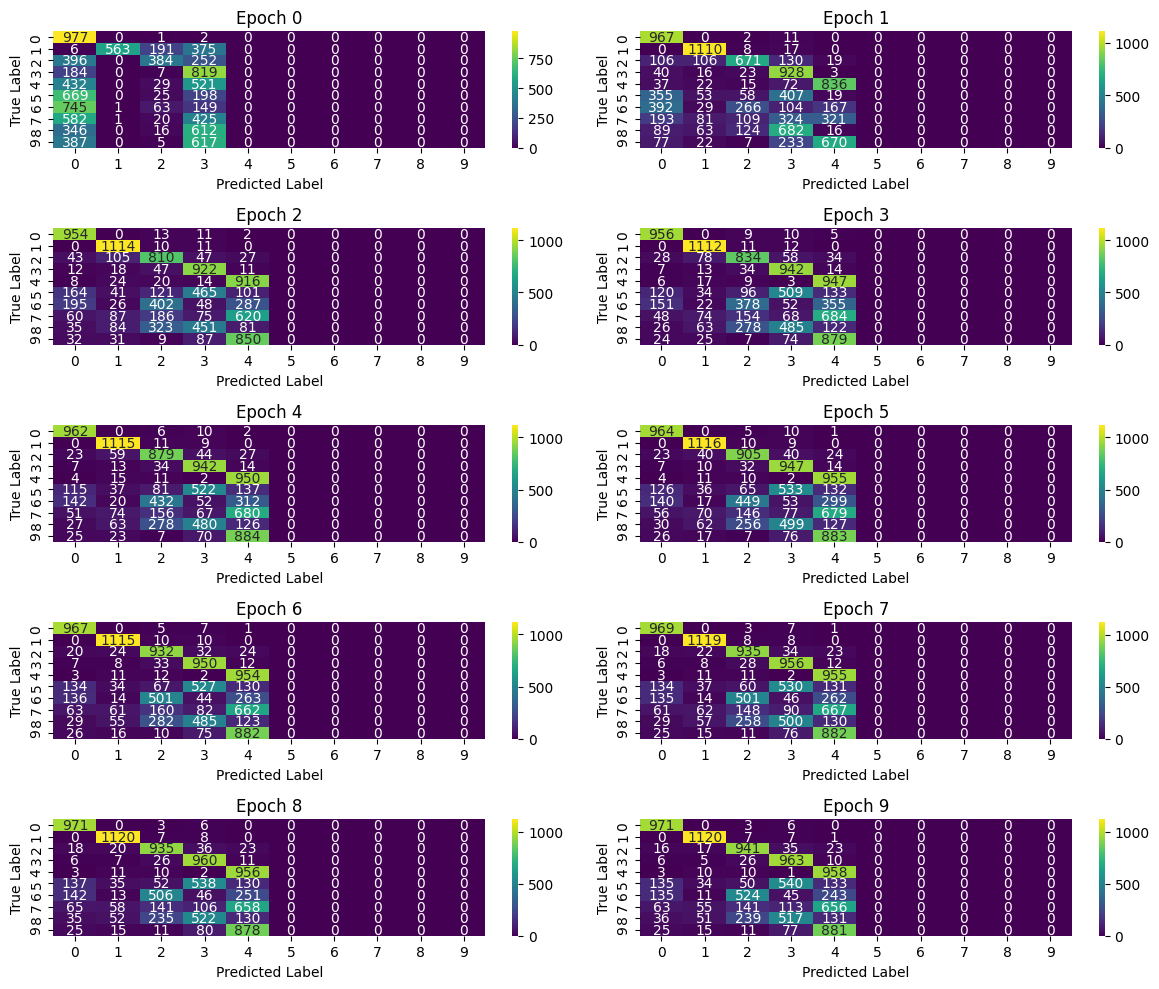

In [3]:

# Configurar la cuadrícula de subgráficos
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 10))

# Iterar sobre los archivos y las ubicaciones de subgráficos
for i, ax in enumerate(axes.flatten()):
    # Crear el nombre del archivo
    file_name = f'logs/epoch_{i}_fase_0.txt'
    
    # Verificar si el archivo existe
    if os.path.exists(file_name):
        # Abre el archivo en modo de lectura ('r')
        with open(file_name, 'r') as archivo:
            # Lee el contenido del archivo
            contenido = archivo.read()
            
            # Convierte la expresión literal de Python en la estructura de datos original
            data = ast.literal_eval(contenido)

        # Extraer etiquetas reales y predicciones
        real_labels, predicted_labels = zip(*data)

        # Crear una matriz de confusión
        conf_matrix = confusion_matrix(real_labels, predicted_labels)

        # Crear un mapa de calor en el subgráfico actual
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
                    xticklabels=set(real_labels), yticklabels=set(real_labels), ax=ax)

        # Añadir etiquetas a los ejes
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
        ax.set_title(f'Epoch {i}')

# Ajustar diseño y mostrar el mosaico de mapas de calor
plt.tight_layout()
plt.show()


### Segunda etapa de entrenamiento

Aquí se entrena con las clases de 5-9

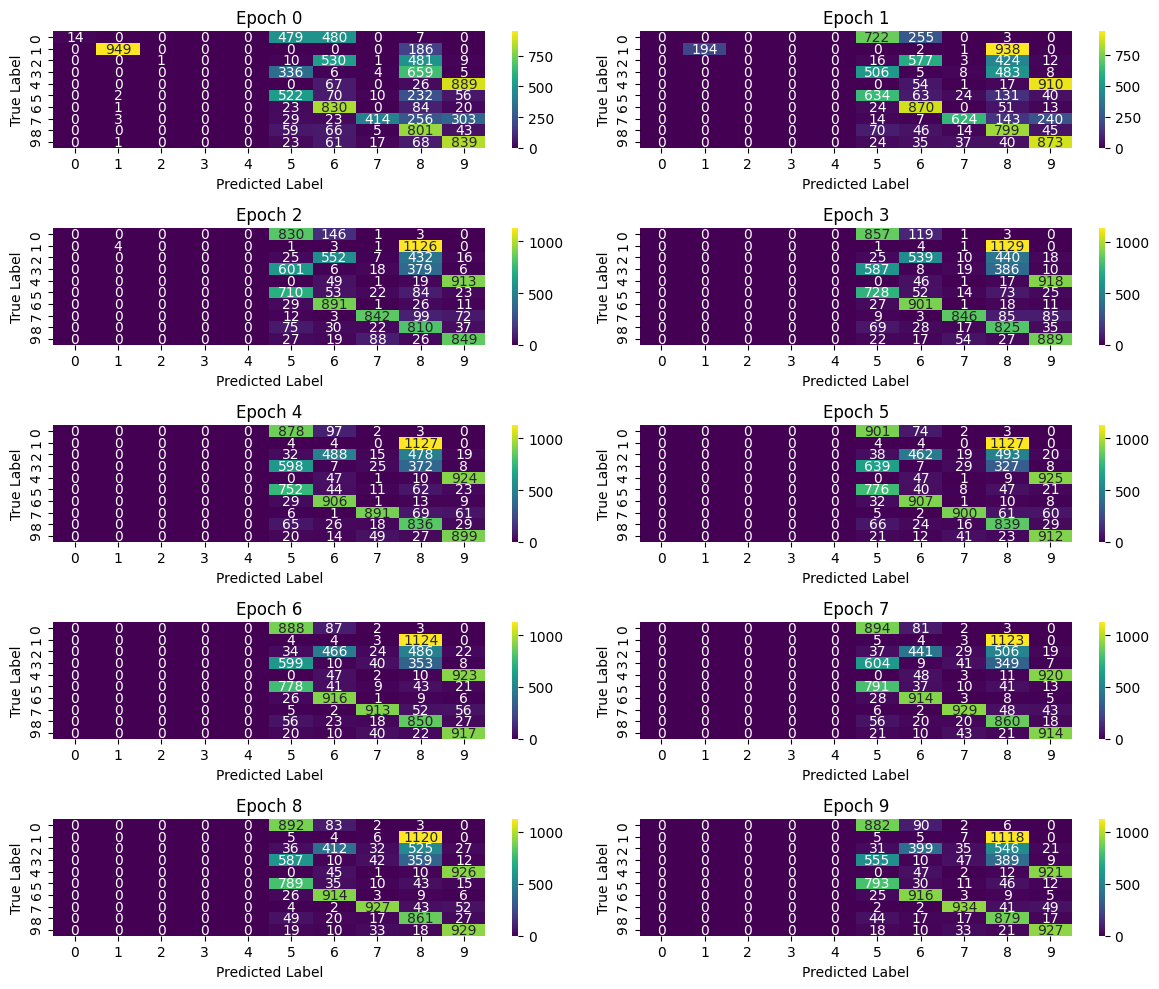

In [5]:

# Configurar la cuadrícula de subgráficos
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 10))

# Iterar sobre los archivos y las ubicaciones de subgráficos
for i, ax in enumerate(axes.flatten()):
    # Crear el nombre del archivo
    file_name = f'logs/epoch_{i}_fase_1.txt'
    
    # Verificar si el archivo existe
    if os.path.exists(file_name):
        # Abre el archivo en modo de lectura ('r')
        with open(file_name, 'r') as archivo:
            # Lee el contenido del archivo
            contenido = archivo.read()
            
            # Convierte la expresión literal de Python en la estructura de datos original
            data = ast.literal_eval(contenido)

        # Extraer etiquetas reales y predicciones
        real_labels, predicted_labels = zip(*data)

        # Crear una matriz de confusión
        conf_matrix = confusion_matrix(real_labels, predicted_labels)

        # Crear un mapa de calor en el subgráfico actual
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
                    xticklabels=set(real_labels), yticklabels=set(real_labels), ax=ax)

        # Añadir etiquetas a los ejes
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
        ax.set_title(f'Epoch {i}')

# Ajustar diseño y mostrar el mosaico de mapas de calor
plt.tight_layout()
plt.show()


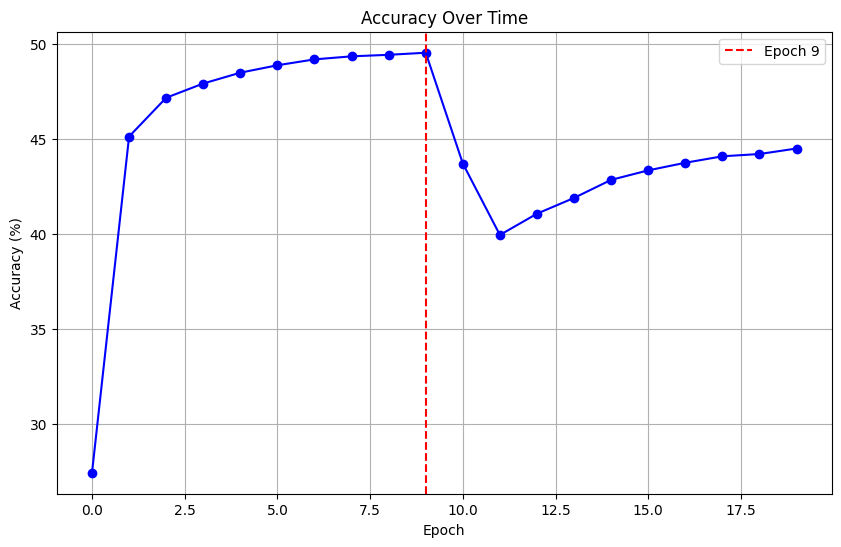

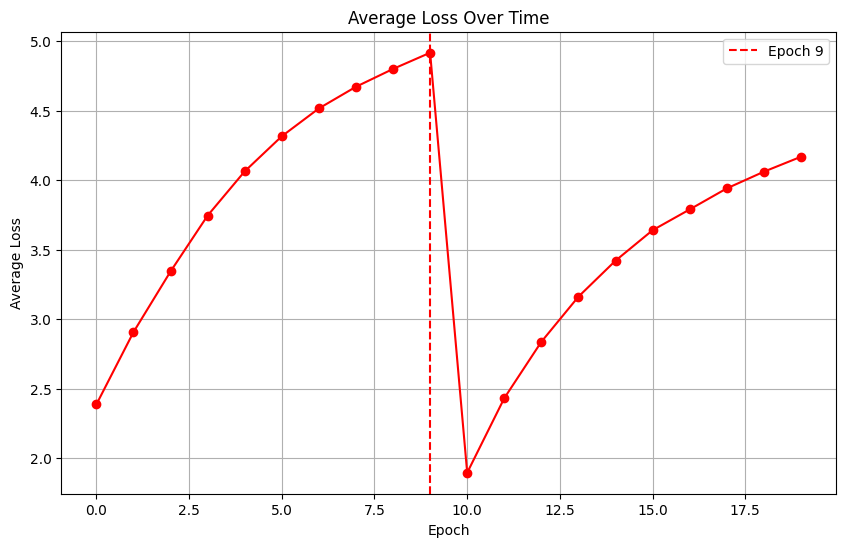

In [6]:
import matplotlib.pyplot as plt

# Abrir y leer el archivo
with open('logs/log_accuracy_loss.txt', 'r') as file:
    accuracy_loss_list = eval(file.read())

# Desempaquetar la lista en dos listas separadas
accuracies, avg_losses = zip(*accuracy_loss_list)



# Graficar la precisión (accuracy)
plt.figure(figsize=(10, 6))
plt.plot(accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
# Añadir línea vertical en la epoch 24
plt.axvline(x=9, color='r', linestyle='--', label='Epoch 9'); plt.legend()
plt.show()

# Graficar la pérdida promedio (avg loss)
plt.figure(figsize=(10, 6))
plt.plot(avg_losses, marker='o', linestyle='-', color='r')
plt.title('Average Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)

# Añadir línea vertical en la epoch 24
plt.axvline(x=9, color='r', linestyle='--', label='Epoch 9'); plt.legend()

plt.show()


### Modificando el clasificador

### Experimento 1

Experimentno f_0(0_4) and f_1(5_9)

Al clasificador fase 1. Le cambio los pesos con los que clasifica las clases de la fase 0 por los pesos que usamos en la fase 0

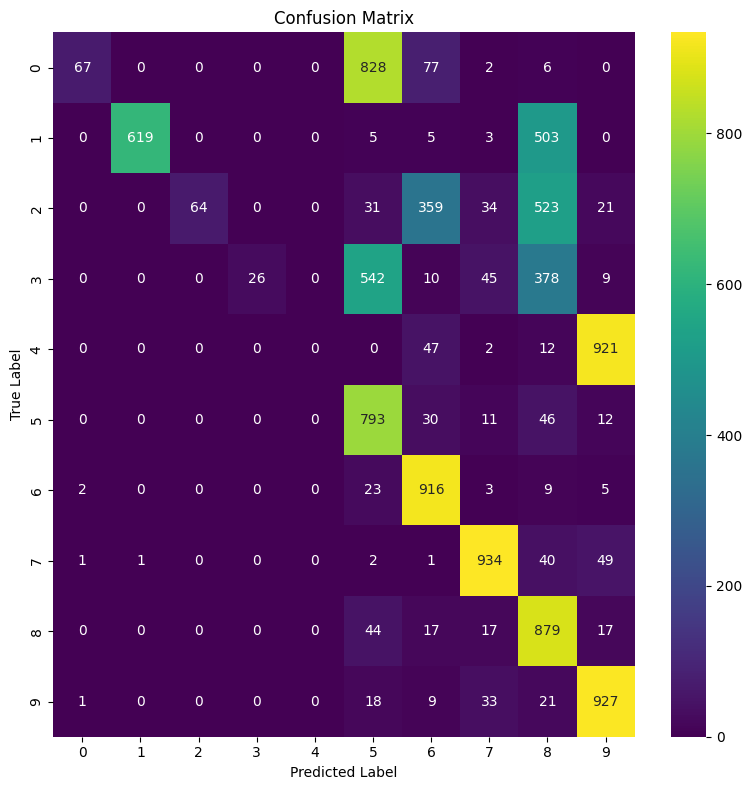

In [3]:
import os
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Configurar la cuadrícula de subgráficos
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

# Nombre del archivo
file_name = 'f_0(0_to_4)andf_1(5_to_9).txt'

# Verificar si el archivo existe
if os.path.exists(file_name):
    # Abre el archivo en modo de lectura ('r')
    with open(file_name, 'r') as archivo:
        # Lee el contenido del archivo
        contenido = archivo.read()
        
        # Convierte la expresión literal de Python en la estructura de datos original
        data = ast.literal_eval(contenido)

    # Extraer etiquetas reales y predicciones
    real_labels, predicted_labels = zip(*data)

    # Crear una matriz de confusión
    conf_matrix = confusion_matrix(real_labels, predicted_labels)

    # Crear un mapa de calor en el subgráfico actual
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
                xticklabels=set(real_labels), yticklabels=set(real_labels), ax=axes)

    # Añadir etiquetas a los ejes
    axes.set_xlabel('Predicted Label')
    axes.set_ylabel('True Label')
    axes.set_title(f'Confusion Matrix')

# Ajustar diseño y mostrar el mosaico de mapas de calor
plt.tight_layout()
plt.show()


Colocando los pesos de la fase uno, adquiere la habilidad aunque al igual bastante deficiente de clasificar elementos de la fase 0.

### Experimento 2

Experimento f_0(5_9) and f_1(0_4)

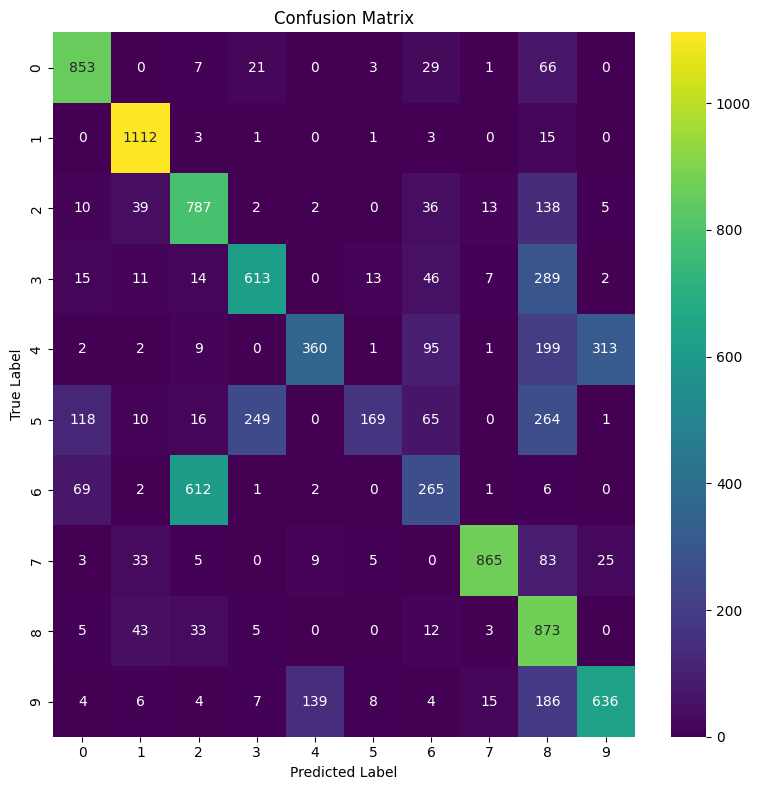

In [4]:
import os
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Configurar la cuadrícula de subgráficos
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

# Nombre del archivo
file_name = 'f_0(5_to_9)andf_1(0_to_4).txt'

# Verificar si el archivo existe
if os.path.exists(file_name):
    # Abre el archivo en modo de lectura ('r')
    with open(file_name, 'r') as archivo:
        # Lee el contenido del archivo
        contenido = archivo.read()
        
        # Convierte la expresión literal de Python en la estructura de datos original
        data = ast.literal_eval(contenido)

    # Extraer etiquetas reales y predicciones
    real_labels, predicted_labels = zip(*data)

    # Crear una matriz de confusión
    conf_matrix = confusion_matrix(real_labels, predicted_labels)

    # Crear un mapa de calor en el subgráfico actual
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
                xticklabels=set(real_labels), yticklabels=set(real_labels), ax=axes)

    # Añadir etiquetas a los ejes
    axes.set_xlabel('Predicted Label')
    axes.set_ylabel('True Label')
    axes.set_title(f'Confusion Matrix')

# Ajustar diseño y mostrar el mosaico de mapas de calor
plt.tight_layout()
plt.show()


Aquí es mucho mas habil clasificando los elementos de la fase 0. Lo cual me parece bastante raro, ya que estos pesos que usa para clasificar estos elementos son los de la fase 1. 

- Aquí la pregunta que se me genera es como los pesos de diferentes clases interactuan entre ellos para hacer las clasificaciones, porque según parace los pesos de una clase no son independientes para hacer la clasificaciones.

### Experimento 3

Aquí estamos cambiando todo el clasificador de la fase uno, por uno que se entreno con todas las clases.

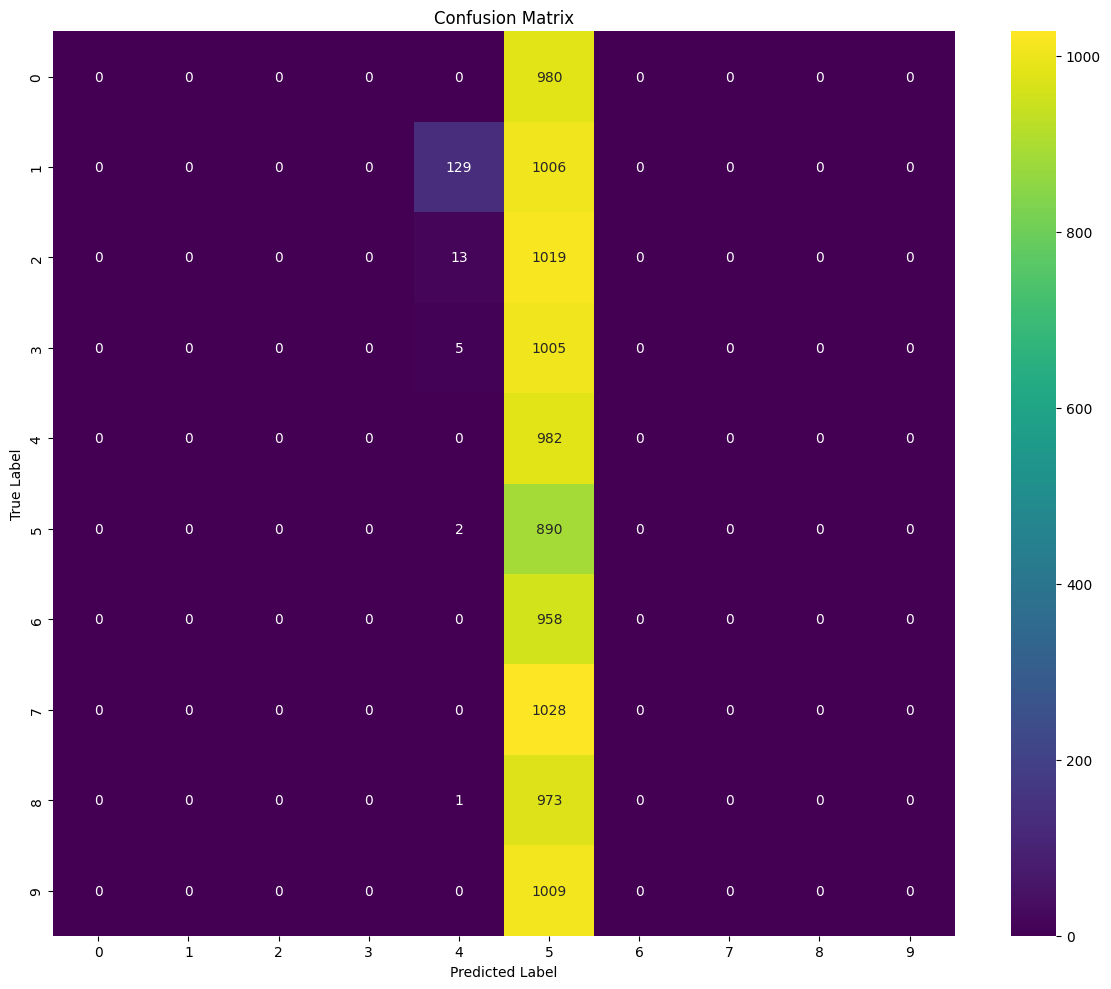

In [14]:
import os
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Configurar la cuadrícula de subgráficos
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))

# Nombre del archivo
file_name = 'tune_last_classifier.txt'

# Verificar si el archivo existe
if os.path.exists(file_name):
    # Abre el archivo en modo de lectura ('r')
    with open(file_name, 'r') as archivo:
        # Lee el contenido del archivo
        contenido = archivo.read()
        
        # Convierte la expresión literal de Python en la estructura de datos original
        data = ast.literal_eval(contenido)

    # Extraer etiquetas reales y predicciones
    real_labels, predicted_labels = zip(*data)

    # Crear una matriz de confusión
    conf_matrix = confusion_matrix(real_labels, predicted_labels)

    # Crear un mapa de calor en el subgráfico actual
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
                xticklabels=set(real_labels), yticklabels=set(real_labels), ax=axes)

    # Añadir etiquetas a los ejes
    axes.set_xlabel('Predicted Label')
    axes.set_ylabel('True Label')
    axes.set_title(f'Confusion Matrix')

# Ajustar diseño y mostrar el mosaico de mapas de calor
plt.tight_layout()
plt.show()


- ¿Por qué todo se clasifica en 5?

### Experimento 4

Aquí lo que hacemos es cambiar el clasificador de la fase 0 por un clasificador de un modelo que se entreno directamente con todas las clases

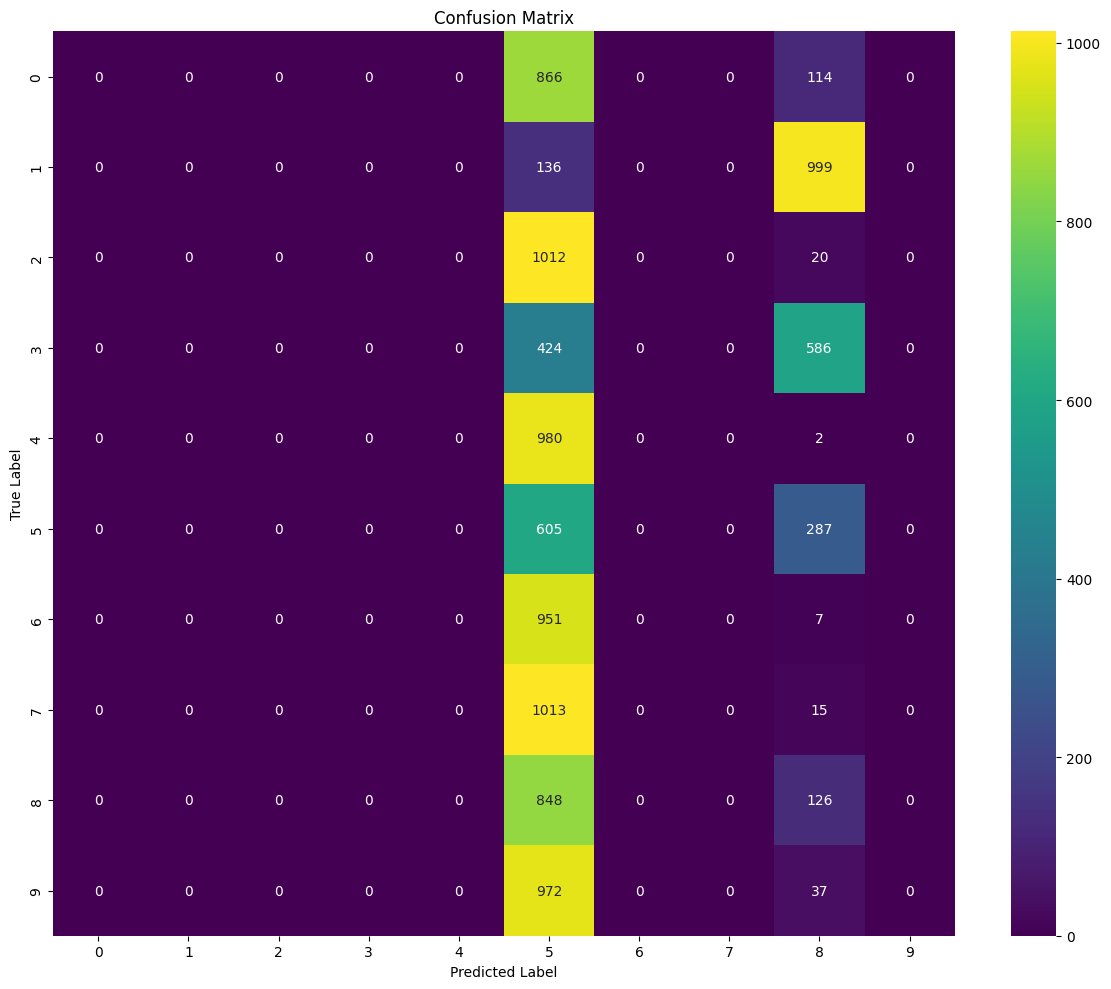

In [16]:
import os
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Configurar la cuadrícula de subgráficos
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))

# Nombre del archivo
file_name = 'tune_first_classifier.txt'

# Verificar si el archivo existe
if os.path.exists(file_name):
    # Abre el archivo en modo de lectura ('r')
    with open(file_name, 'r') as archivo:
        # Lee el contenido del archivo
        contenido = archivo.read()
        
        # Convierte la expresión literal de Python en la estructura de datos original
        data = ast.literal_eval(contenido)

    # Extraer etiquetas reales y predicciones
    real_labels, predicted_labels = zip(*data)

    # Crear una matriz de confusión
    conf_matrix = confusion_matrix(real_labels, predicted_labels)

    # Crear un mapa de calor en el subgráfico actual
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
                xticklabels=set(real_labels), yticklabels=set(real_labels), ax=axes)

    # Añadir etiquetas a los ejes
    axes.set_xlabel('Predicted Label')
    axes.set_ylabel('True Label')
    axes.set_title(f'Confusion Matrix')

# Ajustar diseño y mostrar el mosaico de mapas de calor
plt.tight_layout()
plt.show()


- Aquí de nuevo todo se clasifica en la clase 5.